In [41]:
# Import and load libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import calendar
import nltk
nltk.download('vader_lexicon') # one time only
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Ingest the email data
emails2018 = pd.read_csv('emails-2018.csv', index_col=[6])
emails2019 = pd.read_csv('emails-2019.csv', index_col=[6])
emails2020 = pd.read_csv('emails-2020.csv', index_col=[6])

emails = pd.concat([emails2018, emails2019, emails2020])

# Let's see what we're working with
print(emails.info())
emails.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27732 entries, AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gXAAA= to AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AALCXMumAAA=
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentFrom       27731 non-null  object
 1   SentTo         27405 non-null  object
 2   SentCC         5376 non-null   object
 3   ReceivedDate   27732 non-null  object
 4   EmailSubject   27562 non-null  object
 5   PlainTextBody  27652 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB
None


,SentFrom,SentTo,SentCC,ReceivedDate,EmailSubject,PlainTextBody
MessageIdentifier,,,,,,
AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gXAAA=,Eric Johnson,Council,NaN,2018-12-31 20:01:59.0000000 +00:00,redevelopment of the Balsam BCH campus,"Dear council members, After reading Friday's g..."
AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gWAAA=,Jane McClannan,Council,NaN,2018-12-31 17:26:45.0000000 +00:00,OAU Unintended Consequences,"Dear City Council Members, I have recently spe..."
AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gVAAA=,No Reply,Council,NaN,2018-12-31 14:09:40.0000000 +00:00,Messages on hold for [6bb18bf32d5a8f2798e95f9c...,"The following messages, addressed to Council, ..."
AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gUAAA=,Matt Young,Council,NaN,2018-12-31 11:47:31.0000000 +00:00,Pls keep shelter open all winter,Dear Council -- I urge you to accept the propo...
AAMkADQ2ZmVlYWI4LWI1MmEtNDc1NC05ZjhkLTI5YTA3ZDZhYWFkZABGAAAAAABKVzMXYWWETKNC5OzLgZmiBwDAPnDKzs5_QbpGrs-tvK30AAAAAAEMAADAPnDKzs5_QbpGrs-tvK30AAHQ_5gTAAA=,Rabbi Deborah Bronstein,Council,NaN,2018-12-31 11:24:29.0000000 +00:00,Emergency shelter all winter,"Dear Members of the City Council, I appreciate..."


In [12]:
# Clean the data
emails['ReceivedDate'] = pd.to_datetime(emails['ReceivedDate'])
emails['year'] = emails.apply(lambda x: x['ReceivedDate'].year, axis=1)
emails['month'] = emails.apply(lambda x: x['ReceivedDate'].month, axis=1)
emails['week'] = emails.apply(lambda x: x['ReceivedDate'].weekofyear, axis=1)


In [13]:
# Do the sentiment analysis
sentimentScore = []
vader = SentimentIntensityAnalyzer()

def GetSentiment(text):
    score = vader.polarity_scores(str(text))
    if (score['compound'] > 0):
        return 'positive'
    elif score['compound'] == 0:
        return 'neutral'
    else:
        return 'negative'

emails['Sentiment'] = emails.apply(lambda row: GetSentiment(row['PlainTextBody']), axis=1)

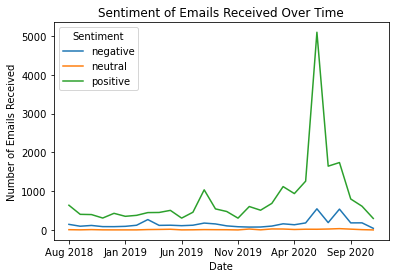

In [14]:
# Plot the count of sentiment over time
emails = emails.sort_values(by=['year', 'month'])

dates = emails.groupby([emails.year, emails.month, emails['Sentiment']]).size()
dates.unstack().plot()

## Format the x-axis labels to show month abbrev and year
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    if not label:
        new_labels.append("")
    else:
        l = label.strip('()').split(',')
        month = calendar.month_abbr[int(l[1])]
        new_labels.append(f"{month} {l[0]}")

locs, labels = plt.xticks()

plt.ylabel('Number of Emails Received')
plt.xlabel('Date')
ax.set_xticklabels(new_labels)
plt.title('Sentiment of Emails Received Over Time')
plt.show()

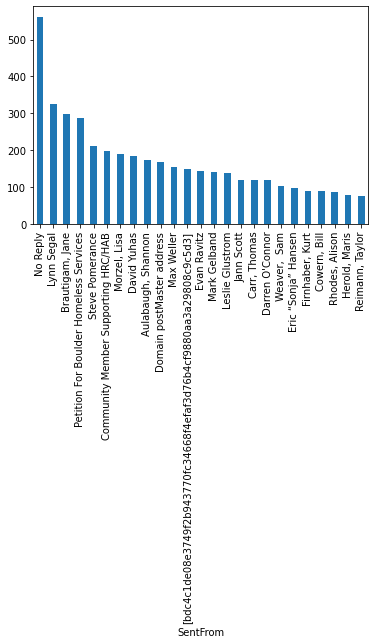

In [15]:
# Who emails the most?
## We'll visualize this better with Tableau later, but display this preview
squeaky_wheels = emails.groupby([emails.SentFrom]).size().sort_values(ascending=False).head(25)

squeaky_wheels.plot(kind='bar')
plt.show()

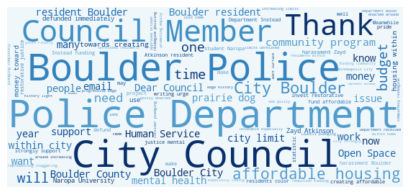

In [62]:
# Time to build a word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from PIL import Image

# Get the text into a long string
text = emails.PlainTextBody.tolist()
text = ' '.join(map(str, text))

# set up the image mask
#mask = np.array(Image.open('boulder-small.png'))

cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1])

wordcloud = WordCloud(width=550, height=250, max_words=100, colormap=cmap, contour_width=4, background_color='#f0f7fa',
    stopwords=STOPWORDS, collocations=True, min_word_length=3).generate(text)

# increase the plot size to match the mask
plt.figure(figsize=(5.5, 2.5), frameon=False)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('wordcloud.png')

In [ ]:
# That's all well and good, but I want the wordcloud to be interactive on a Tableau dashboard

## TODO: First, extract the top 100 words from the wordcloud

In [7]:
## Save the combined dataframe to a csv for consumption in Tableau
emails.to_csv('emails-combined.csv')